<a href="https://colab.research.google.com/github/cicily19/ExploratoryDataAnalysisCaseStudy_SupermarketSalesDataets/blob/main/AppliedDataAnalysisCaseStudy1_Supermarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis Case Study 1 : Supermarket Sales Datasets.

#### Context - Kaggle
The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

#### Objectives

A supermarket chain is looking to expand their business. The company leadership team has provided the data science team with historical supermarket sales data. Leadership is interested in finding answers to several questions:

    1. What is the average purchase total of a customer's cart?
    2. What was the average overall customer rating?
    3. How do customer ratings compare at each of our 3 branch locations?
    4. Which branch location is most profitable?
    5. Do members tend to spend more money than non-members?
    6. What is our best selling product line?
    7. How do sales fluctuate during the week? Which day of the week is most profitable?


In [ ]:
# Step1: Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the Dataset(Make Sure it is Uploaded on Colab Storage Session)
df = pd.read_csv('/content/supermarket_sales - Sheet1.csv')
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
# Checking Empty Records
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [ ]:
# Checking Duplicates
df.duplicated().sum()

0

In [ ]:
# Data Transformation : The Date Columns.
# The Data Column has to be transformed in a suitable format for Time Series Analysis(Trend Analysis)
df['Date']

,Date
0,1/5/2019
1,3/8/2019
2,3/3/2019
3,1/27/2019
4,2/8/2019
...,...
995,1/29/2019
996,3/2/2019
997,2/9/2019
998,2/22/2019


In [ ]:
# The Date Column is currently Storing the Date of Transaction as Objects.
# Converting the Date Column from String Objects to Datetime will be suitable for time Series Analysis.
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

,Date
0,2019-01-05
1,2019-03-08
2,2019-03-03
3,2019-01-27
4,2019-02-08
...,...
995,2019-01-29
996,2019-03-02
997,2019-02-09
998,2019-02-22


Now that Date is a datetime object, we can now set the index of all transaction as date, which means all the transctions will be recorded according to the Date

In [ ]:
df.head(5)
# Transactions are index based on Numbers ranging from 0 to 999

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.set_index('Date', inplace=True)
df.head(5)

# Now Lets also sort the Date Index Column in Ascending Order

df.sort_index(inplace=True)

In [ ]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,4.761905,8.448,6.3
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,4.761905,29.583,7.7
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,4.761905,19.036,5.7
2019-01-01,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,20:26,Ewallet,108.16,4.761905,5.408,6.9
2019-01-01,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,11:43,Cash,125.74,4.761905,6.287,5.0


The previous index column has been successfully replaced by the Date column. We see that there are now 16 columns instead of the original 17. The dates are also correctly sorted from 2019-01-01 to 2019-03-30.

Let's also add a column with day of the week for later time series analysis.

In [ ]:
df['day_of_week'] = df.index.day_of_week
df.head(5)
df.groupby('day_of_week').size()
# Days of the Week as Listed as Numeric, whereby:
# 0 -> Monday
# 1 -> Tuesday
# ..
# 6 -> Sunday

,0
day_of_week,
0,125
1,158
2,143
3,138
4,139
5,164
6,133


In [ ]:
# We want to Label Encode the Day of the Week using the map function from Numerical to Categorical Representation
df['day_of_week'] = df['day_of_week'].map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
df.head(5)
#

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,day_of_week
Date,,,,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,4.761905,8.448,6.3,Tuesday
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,4.761905,29.583,7.7,Tuesday
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,4.761905,19.036,5.7,Tuesday
2019-01-01,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,20:26,Ewallet,108.16,4.761905,5.408,6.9,Tuesday
2019-01-01,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,11:43,Cash,125.74,4.761905,6.287,5.0,Tuesday


## SANITY CHECK
1. Number of Transactions that were Recorded on Every Branch.

In [ ]:
df.groupby('Branch').size()

,0
Branch,
A,340
B,332
C,328


In [ ]:
df.groupby('City').size()

,0
City,
Mandalay,332
Naypyitaw,328
Yangon,340


Branch A is Located in Yangon and had of 340 transaction, Branch Located in Manadalay with a Total of 332 transaction and Branch C is Located in Naypyitaw with a Total of 328 transactions.

In [ ]:
# Statististical Analysis
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


### Observations
1. The average customer rating was 6.97270 out of 10. The minimum rating was 4.00000 and the maximum was 10.00000.
2. The maximum Quantity was 10 and minimum Quantity was 1.

## DATA CLEANING

1. The Company that we needed to remove gross margin pertantage and gross income column because, they had no use in our analysis.

In [ ]:
df.drop(['gross margin percentage', 'gross income'],axis=1, inplace=True)
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,Rating,day_of_week
Date,,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,6.3,Tuesday
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,7.7,Tuesday
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,5.7,Tuesday
2019-01-01,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,20:26,Ewallet,108.16,6.9,Tuesday
2019-01-01,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,11:43,Cash,125.74,5.0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-30,743-04-1105,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,14:43,Ewallet,874.98,6.0,Saturday
2019-03-30,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,12:51,Credit card,81.44,9.5,Saturday
2019-03-30,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,20:37,Cash,290.46,6.7,Saturday


## DATA ANALYSIS
1. What is the overall customer rating for the supermarket company?

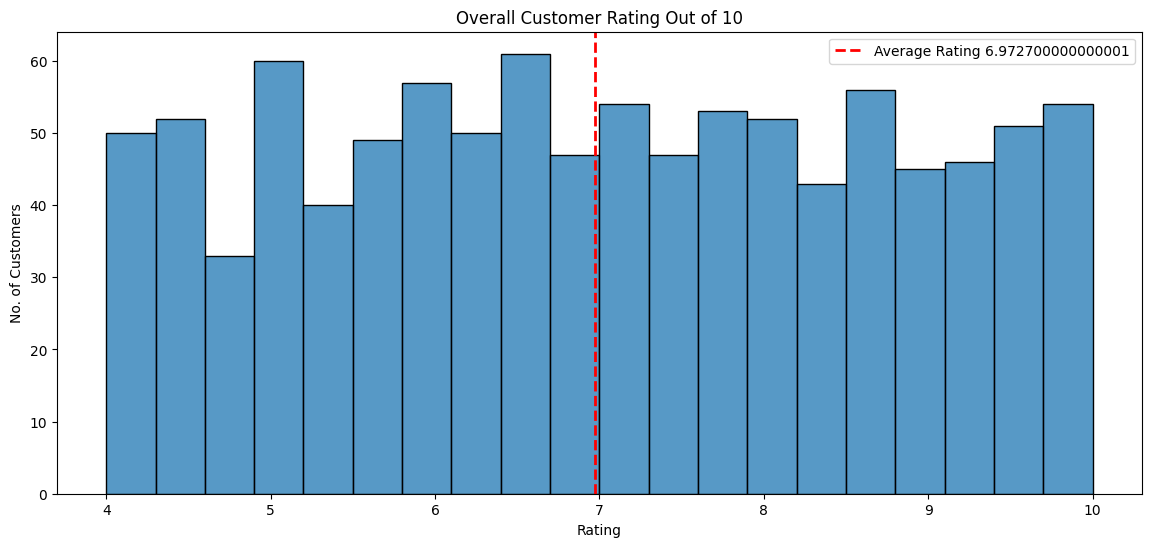

In [ ]:
# Visualize the Distribution of Ratings in a Histogram
plt.figure(figsize=(14,6))
sns.histplot(df['Rating'], bins=20)
plt.title('Overall Customer Rating Out of 10')
plt.xlabel('Rating')
plt.ylabel('No. of Customers')

average_rating = df['Rating'].mean()
plt.axvline(average_rating, color='red', linestyle='--', linewidth=2)
plt.legend([f'Average Rating {average_rating}'])

plt.show()



*   There is a fairly even distribution of ratings from 4 - 10
*   The overall average rating was 6.97 out of 10




### 2. How do customer ratings compare across the 3 supermarket branches?
Now, let's examine each of the 3 branches of the supermarket to view their individual distributions of ratings. Is there a particular branch with lower customer satisfaction? Recall that Branch A of the supermarket is in Yangon, Branch B is in Mandalay, and Branch C is in Naypyitaw.

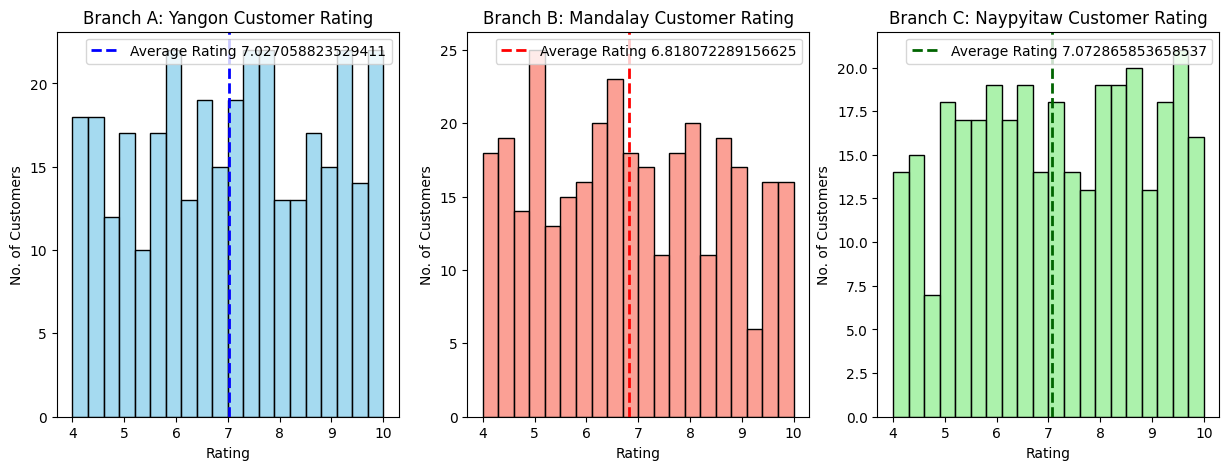

In [ ]:
# Create 3 subsets dataframes, where we will filter each transactions based on the city
yangon_df = df[df['City'] == 'Yangon']
mandalay_df = df[df['City'] == 'Mandalay']
naypyitaw_df = df[df['City'] == 'Naypyitaw']

# Set up 3 histograms for each city side by side using subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot the distribution of ratings for each city
sns.histplot(yangon_df['Rating'], bins=20, ax=axes[0], color='skyblue')
sns.histplot(mandalay_df['Rating'], bins=20,  ax=axes[1], color='salmon')
sns.histplot(naypyitaw_df['Rating'], bins=20, ax=axes[2], color='lightgreen')

# set the Titles for Each Plot corresponding with the City.
axes[0].set_title('Branch A: Yangon Customer Rating')
axes[1].set_title('Branch B: Mandalay Customer Rating')
axes[2].set_title('Branch C: Naypyitaw Customer Rating')

# Set the Xlabel
axes[0].set_xlabel('Rating')
axes[1].set_xlabel('Rating')
axes[2].set_xlabel('Rating')

# set the Ylabel
axes[0].set_ylabel('No. of Customers')
axes[1].set_ylabel('No. of Customers')
axes[2].set_ylabel('No. of Customers')

# Add the Average
average_rating_yangon = yangon_df['Rating'].mean()
average_rating_mandalay = mandalay_df['Rating'].mean()
average_rating_naypyitaw = naypyitaw_df['Rating'].mean()

# a) yangon
axes[0].axvline(average_rating_yangon, color='blue', linestyle='--', linewidth=2)
axes[0].legend([f'Average Rating {average_rating_yangon}'])

# b) mandalay
axes[1].axvline(average_rating_mandalay, color='red', linestyle='--', linewidth=2)
axes[1].legend([f'Average Rating {average_rating_mandalay}'])

# c) naypyitaw
axes[2].axvline(average_rating_naypyitaw, color='darkgreen', linestyle='--', linewidth=2)
axes[2].legend([f'Average Rating {average_rating_naypyitaw}'])

plt.show()


#### Observations


*   The rating distributions are relatively similar across all three supermarket branches in different cities
*   The difference in average ratings between supermarket branches is relatively small. The highest rating was 7.07 / 10 in Naypyitaw.
*   The lowest was 6.82 in Mandalay. There is not a single branch that seems to have disproportionately low ratings



## Which product lines drove the highest sales? Which were the most common?

Now we can turn our attention to product lines. If a particular product line is a significant driver of sales, the company can consider investing more into that product line. The company can also address lower performing product lines.

In [ ]:
df.groupby('Product line').size()

,0
Product line,
Electronic accessories,170
Fashion accessories,178
Food and beverages,174
Health and beauty,152
Home and lifestyle,160
Sports and travel,166


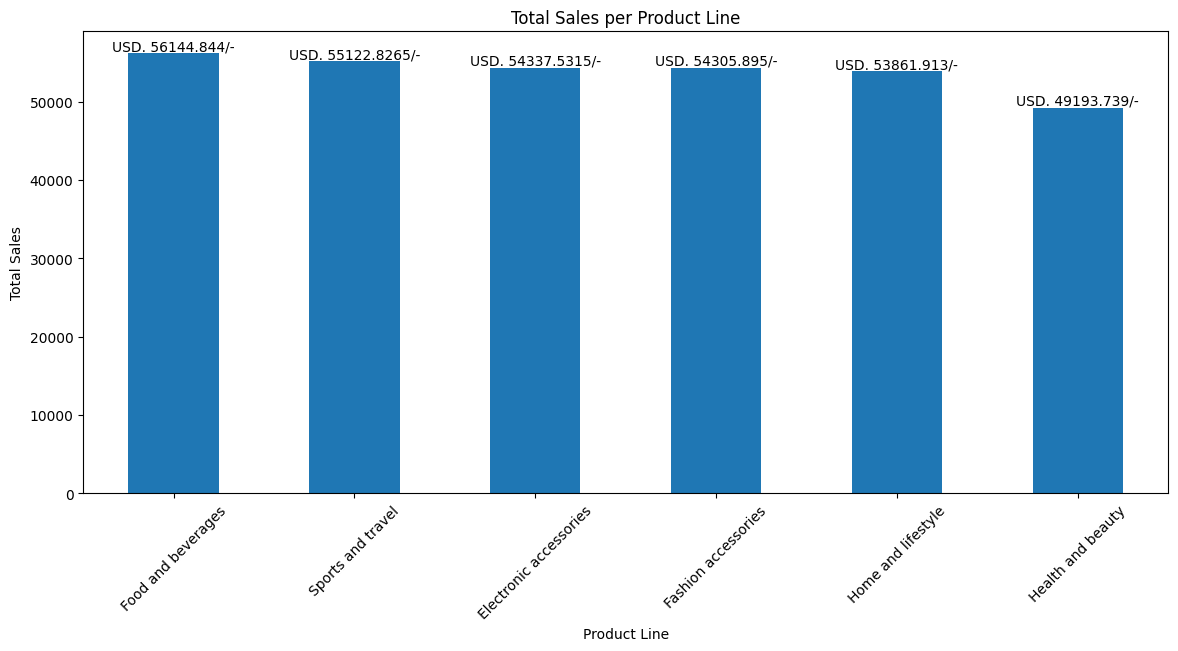

In [ ]:
# Now we Need to group each product line, According to thier total Sales
product_line_totals = df.groupby('Product line').sum('Total')

# Create another dataframe with the product_line_totals sorted from Higheest Revenue to Lowest Revenue
product_line_totals_df = product_line_totals.sort_values(by='Total', ascending=False)
product_line_totals_df

# Visualize the Product line Totals using  bar graphs
plt.figure(figsize=(14,6))
ax = product_line_totals_df['Total'].plot(kind='bar')
plt.title('Total Sales per Product Line')
plt.xlabel('Product Line')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')

# Add the labels of the Maximum Values in the Bars
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'USD. {bar.get_height()}/-', ha='center', va='bottom')
plt.show()



### Observations

*   "Food and Beverages" was the top selling product line with USD 56144.844/- in sales.
*   The next few product lines of "sports and travel", "electronic accessories", "fashion accessories", and "Home and lifestyle" had similar total sales

*   "Health and Beauty" was the lowest selling product line with Ks. 49193.739/- in sales.



## How did product lines perform among different gender categories?
Lets Start by Examining the Gender Categories in the Supermarket.

<ipython-input-91-4674c3195c0a>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(men_product_line_totals_df.index, rotation=45)
<ipython-input-91-4674c3195c0a>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(women_product_line_totals_df.index, rotation=45)


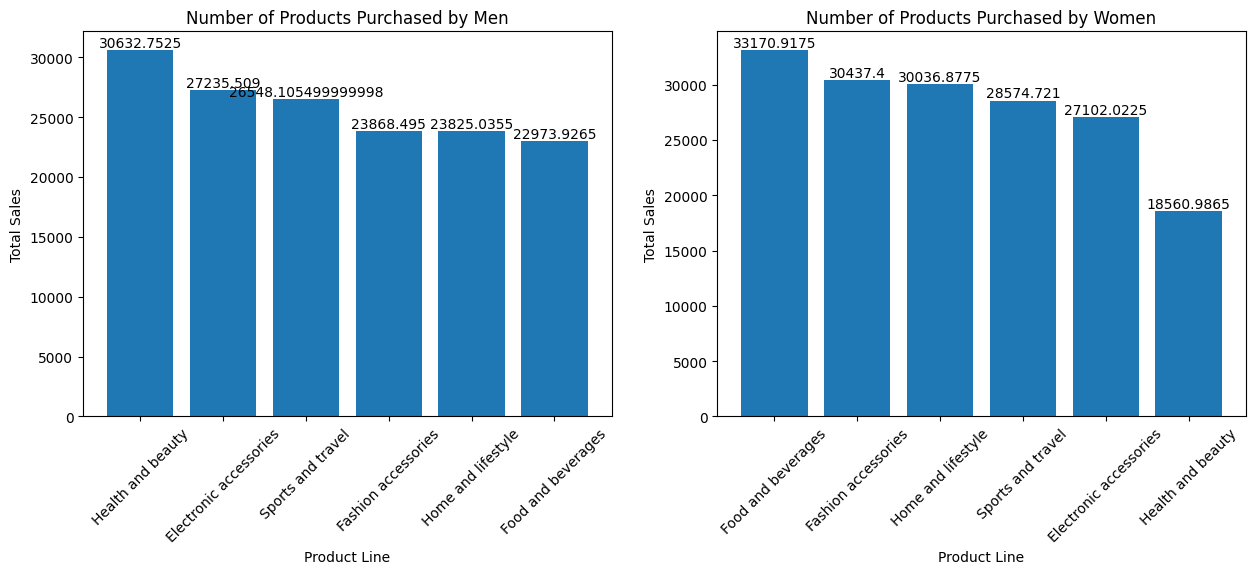

In [ ]:
# Check the Gender Columns
df.groupby('Gender').size()

# Create two separete DataFrames that separates Mens and Women Transaction
men_df = df[df['Gender'] == 'Male']
women_df = df[df['Gender'] == 'Female']

# Also, Lets Separate Products Lines Bought by Men and Women
men_product_line_totals = men_df.groupby('Product line').sum('Total')
women_product_line_totals = women_df.groupby('Product line').sum('Total')

# Sort the two Dataframes from Highest to Lowest
men_product_line_totals_df = men_product_line_totals.sort_values(by='Total', ascending=False)
women_product_line_totals_df = women_product_line_totals.sort_values(by='Total', ascending=False)

# Create two subplots for men and women Dataframes


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# a) Men
axes[0].bar(men_product_line_totals_df.index, men_product_line_totals_df['Total'])
axes[0].set_title('Number of Products Purchased by Men')
axes[0].set_xlabel('Product Line')
axes[0].set_ylabel('Total Sales')
axes[0].set_xticklabels(men_product_line_totals_df.index, rotation=45)

# Add total number of transaction labels for first bar chart
for bar in axes[0].patches:
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{bar.get_height()}', ha='center', va='bottom')


# b) Women
axes[1].bar(women_product_line_totals_df.index, women_product_line_totals_df['Total'])
axes[1].set_title('Number of Products Purchased by Women')
axes[1].set_xlabel('Product Line')
axes[1].set_ylabel('Total Sales')
axes[1].set_xticklabels(women_product_line_totals_df.index, rotation=45)

# Add total number of transaction labels for second bar chart
for bar in axes[1].patches:
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{bar.get_height()}', ha='center', va='bottom')



plt.show()






### Observations


*   Women and men were roughly equally represented in the dataset
*   Write the other at least 5 observations



## How did the sales data fluctuate over time? Trend Analysis/Time Series



In [ ]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,Rating,day_of_week
Date,,,,,,,,,,,,,,,
2019-01-01,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,19:31,Cash,168.96,6.3,Tuesday
2019-01-01,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,13:55,Cash,591.66,7.7,Tuesday
2019-01-01,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,14:47,Cash,380.72,5.7,Tuesday
2019-01-01,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,20:26,Ewallet,108.16,6.9,Tuesday
2019-01-01,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,11:43,Cash,125.74,5.0,Tuesday


In [ ]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,Rating,day_of_week
Date,,,,,,,,,,,,,,,
2019-03-30,743-04-1105,B,Mandalay,Member,Male,Health and beauty,97.22,9,43.749,918.729,14:43,Ewallet,874.98,6.0,Saturday
2019-03-30,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,12:51,Credit card,81.44,9.5,Saturday
2019-03-30,364-34-2972,C,Naypyitaw,Member,Male,Electronic accessories,96.82,3,14.523,304.983,20:37,Cash,290.46,6.7,Saturday
2019-03-30,361-85-2571,A,Yangon,Normal,Female,Sports and travel,89.48,5,22.370,469.770,10:18,Cash,447.40,7.4,Saturday
2019-03-30,676-39-6028,A,Yangon,Member,Female,Electronic accessories,64.44,5,16.110,338.310,17:04,Cash,322.20,6.6,Saturday


In [ ]:
# Lets Get the Total Daily Sales
df.groupby('Date').sum('Total')

,Unit price,Quantity,Tax 5%,Total,cogs,Rating
Date,,,,,,
2019-01-01,659.95,81,225.9610,4745.1810,4519.22,79.0
2019-01-02,357.08,48,92.6430,1945.5030,1852.86,48.4
2019-01-03,475.66,37,98.9585,2078.1285,1979.17,64.9
2019-01-04,310.46,32,77.3185,1623.6885,1546.37,39.1
2019-01-05,739.64,55,168.4135,3536.6835,3368.27,89.2
...,...,...,...,...,...,...
2019-03-26,558.64,52,93.4530,1962.5130,1869.06,86.1
2019-03-27,568.41,45,138.2295,2902.8195,2764.59,67.6
2019-03-28,455.25,48,106.1620,2229.4020,2123.24,70.5


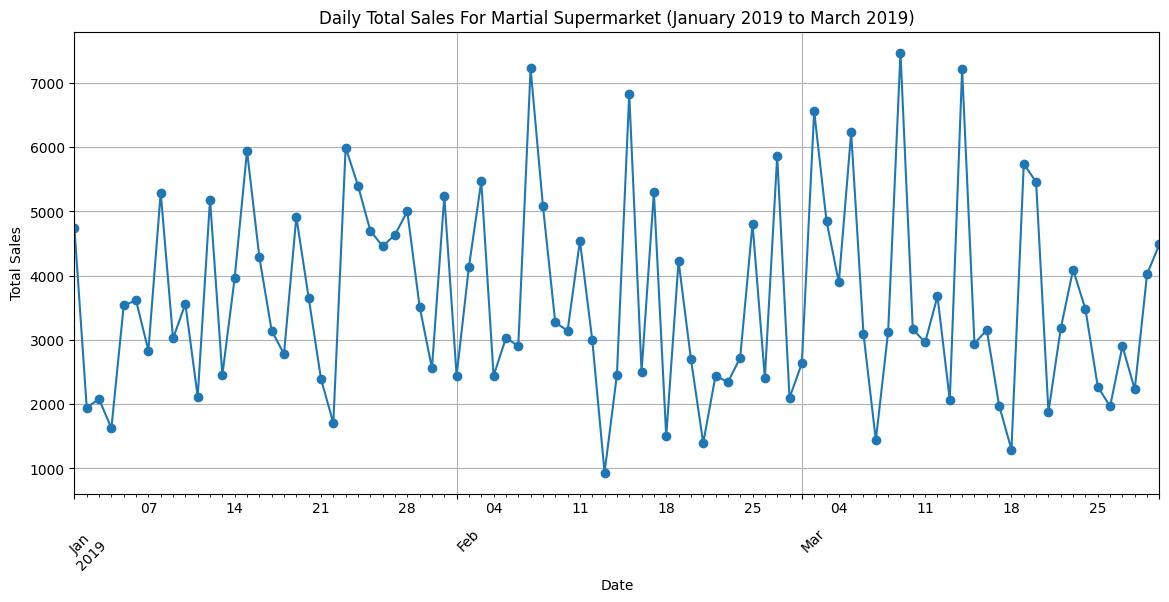

In [ ]:
daily_total_sales = df.groupby('Date')['Total'].sum()
daily_total_sales

# Plot the Daily Total Sales in a Times Series Graph(Line Chart)
plt.figure(figsize=(14, 6))
daily_total_sales.plot(marker='o')
plt.title('Daily Total Sales For Martial Supermarket (January 2019 to March 2019)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')

plt.grid(True)
plt.show()
